In [1]:
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial

%matplotlib inline
import matplotlib.pyplot as plt

2018-01-17 22:49:35,752 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
implant = p2p.implants.ArgusII(rot=-0.3)

In [3]:
X = pd.DataFrame([e.name for e in implant], columns=['electrode'])

In [4]:
models = [
    p2pspatial.models.ModelA,
    p2pspatial.models.ModelB
]
params = [
    {'implant_rot': -0.3, 'rho': 100},
    {'implant_rot': -0.3, 'rho': 100}
]

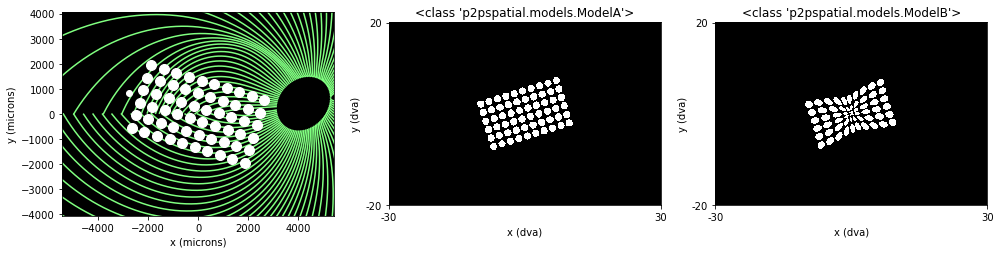

In [5]:
ncols = 3
nrows = int(np.ceil((len(models) + 1) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
for model, kwargs, ax in zip([None] + models, [None] + params, axes.ravel()):
    if not model:
        sim = p2p.Simulation(implant)
        sim.plot_fundus(ax=ax, annotate=False)
        ax.set_title('')
        continue
    m = model(**kwargs)
    m.fit(X)
    img = np.sum([y['image'] for _, y in m.predict(X).iterrows()], axis=0)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([0, img.shape[1]])
    ax.set_xticklabels(m.xrange)
    ax.set_xlabel('x (dva)')
    ax.set_yticks([0, img.shape[0]])
    ax.set_yticklabels(list(m.yrange)[::-1])
    ax.set_ylabel('y (dva)')
    ax.set_title(model)
fig.tight_layout()